# EDA of Penguins DataSet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("penguins.csv")

In [4]:
data

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [5]:
data.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [6]:
data.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [8]:
data.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [9]:
data.describe()

,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [10]:
data.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])
data['bill_length_mm'] = data['bill_length_mm'].fillna(data['bill_length_mm'].median())
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(data['bill_depth_mm'].median())
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].median())
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].median())

In [12]:
data.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [13]:
data.drop_duplicates(inplace = True)

In [16]:
data.columns

Index(['id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [17]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

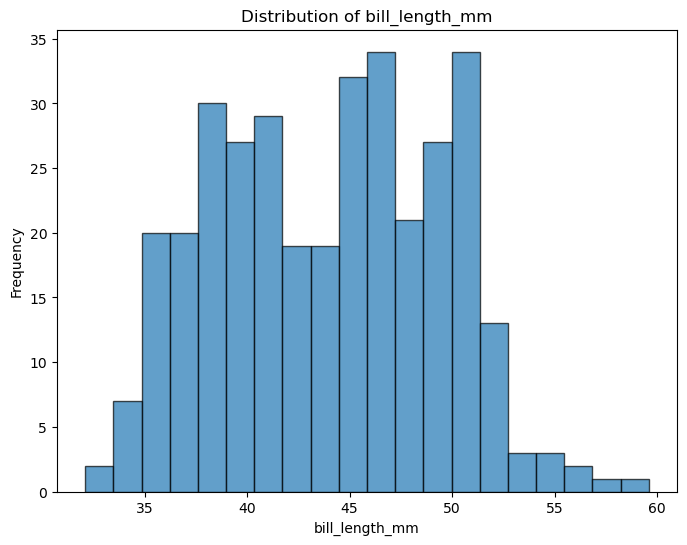

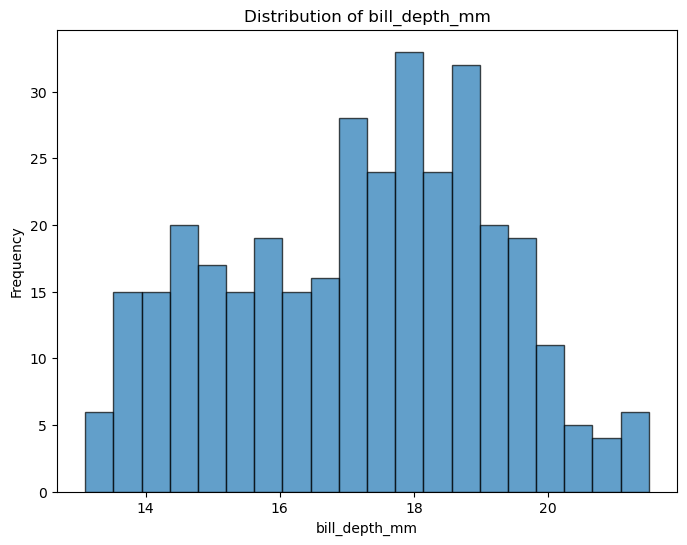

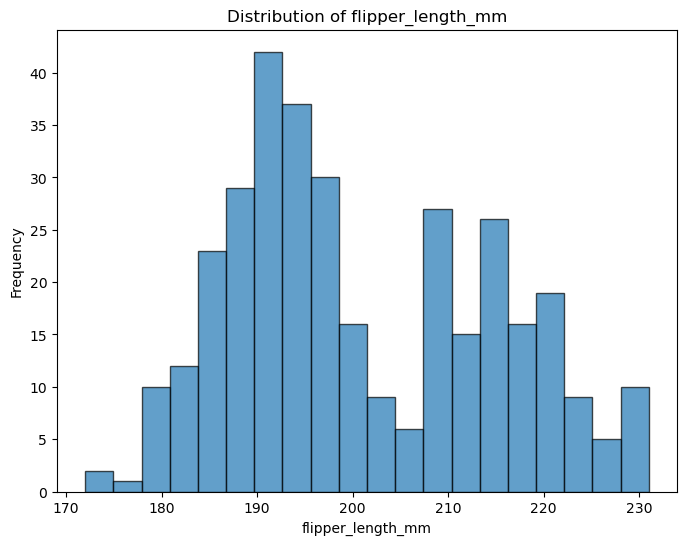

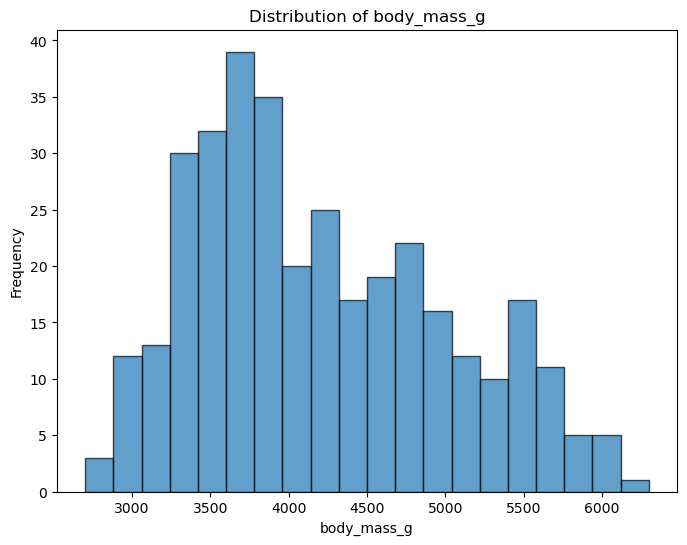

In [25]:
#Distribution of numerical values
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    data[col].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

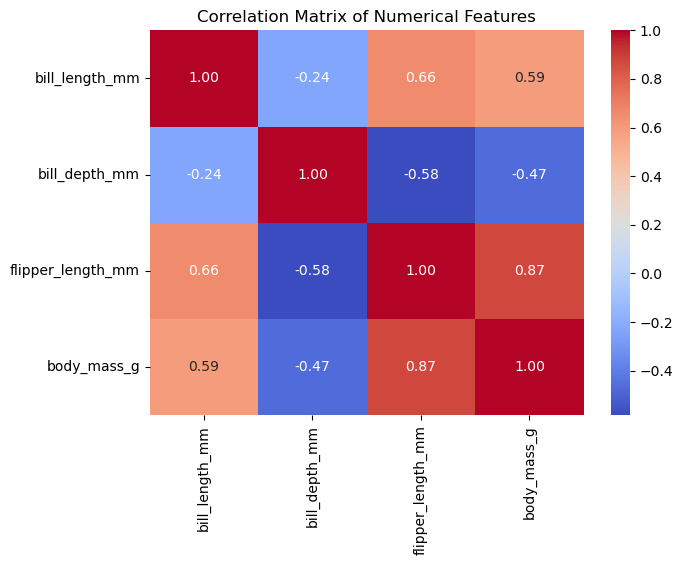

In [26]:
#Correlation Analysis
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [27]:
#Categorical features analysis
print(data['species'].value_counts())    
print(data['island'].value_counts())     
print(data['sex'].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
male      179
female    165
Name: count, dtype: int64


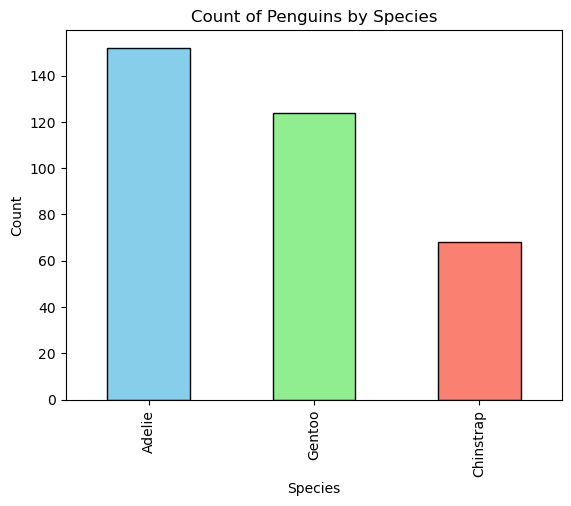

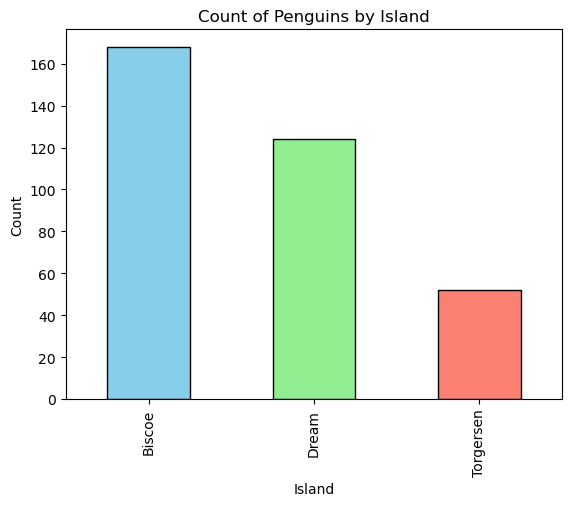

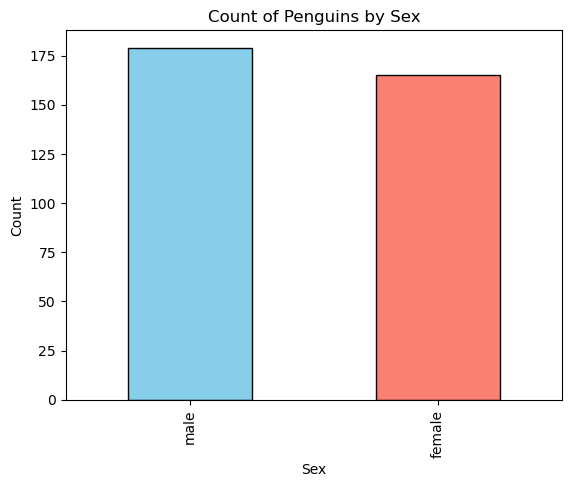

In [30]:
#Visualizing categorical columns using bar plots:
python
Copy

data['species'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title('Count of Penguins by Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

data['island'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title('Count of Penguins by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

data['sex'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Count of Penguins by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

/var/folders/ht/20_cq08n5k163l0ztnvl3b7r0000gn/T/ipykernel_21333/1485141219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=data, palette='Set2')


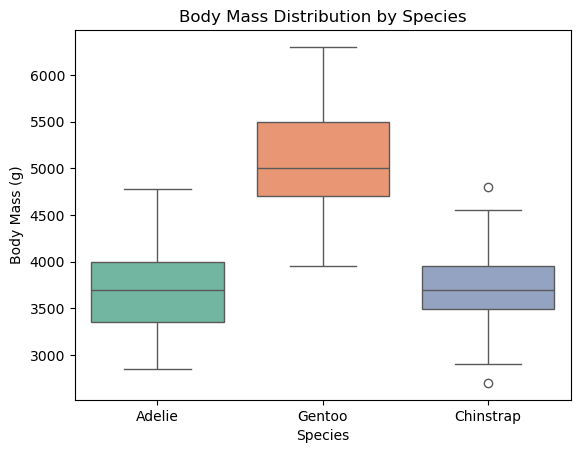

/var/folders/ht/20_cq08n5k163l0ztnvl3b7r0000gn/T/ipykernel_21333/1485141219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='bill_length_mm', data=data, palette='Set2')


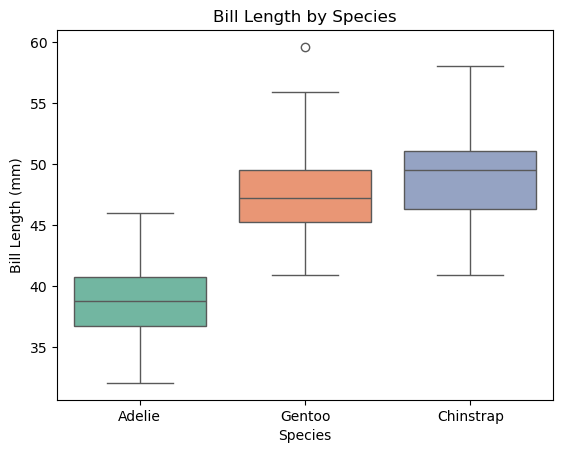

In [32]:
#Visualizig Relationships Between Features
sns.boxplot(x='species', y='body_mass_g', data=data, palette='Set2')
plt.title('Body Mass Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

sns.boxplot(x='species', y='bill_length_mm', data=data, palette='Set2')
plt.title('Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
plt.show()